## 초기 설정

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


## 데이터셋 import 

In [2]:
'''패션 MNIST
Training set: 60,000개의 이미지
Test set: 10,000개의 이미지
'''

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
# load_data() 호출 시 train_images, train_labels, test_images, test_labels 배열 반환

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [6]:
# 데이터셋 구조 분석
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## 데이터 전처리

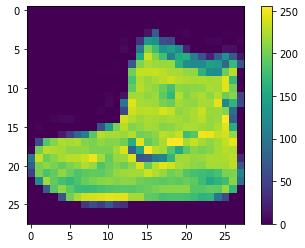

In [14]:
plt.figure()
#<Figure size 432x288 with 0 Axes>
#<Figure size 432x288 with 0 Axes>

plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

# 주피터 노트북이나 IPython에서는 따로 안 적어도 알아서 이미지 보여줌
#plt.show()

In [15]:
# 0~255 → 0~1 사이로 조정
train_images = train_images/255.0
test_images = test_images/255.0

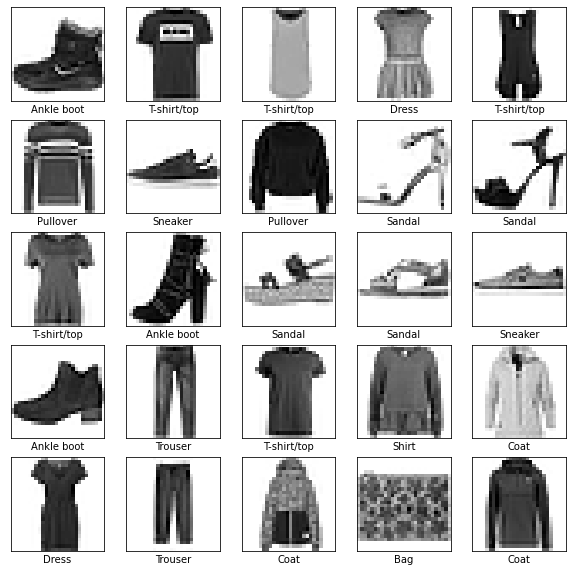

In [19]:
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## 모델 구성

### 층 설정

In [20]:
model = keras.Sequential([
    # 2차원 배열의 이미지 포맷 → 1차원 배열로 변환
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # 두 개의 Dense 층 연결 → 밀집 연결 or 완전 연결층
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일

- 손실 함수(Loss-function): 훈련하는 동안 모델의 오차 측정
- 옵티마이저(Optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법 결정
- 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 모델 훈련

**step.1** 훈련 데이터(train_images, train_labels)를 모델에 주입   
**step.2** 모델은 이미지/레이블 매핑 방법 학습   
**step.3** 테스트셋(test_images)에 대한 모델의 예측 생성 후 예측이 test_labels 배열 레이블과 맞는지 확인   

In [23]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6489 - accuracy: 0.7755
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3935 - accuracy: 0.8583
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3427 - accuracy: 0.8753
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3148 - accuracy: 0.8841
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2951 - accuracy: 0.8895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2789 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2635 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2433 - accuracy: 0.9100
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

## 정확도 평가

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.3277 - accuracy: 0.8854

테스트 정확도: 0.8853999972343445


## 예측 생성

In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([5.8107641e-08, 7.5461339e-13, 3.5092032e-10, 3.8727803e-09,
       9.4589680e-08, 2.2093267e-03, 5.4121585e-08, 3.0012678e-02,
       1.1514742e-07, 9.6777767e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [35]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == np.argmax(predictions_array):
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

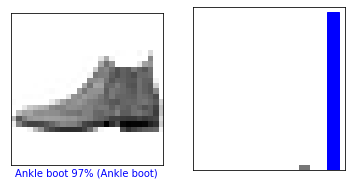

In [36]:
i=0

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

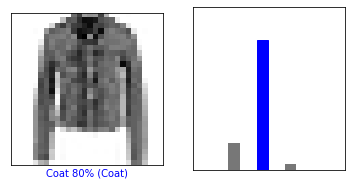

In [37]:
i = 10

plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)

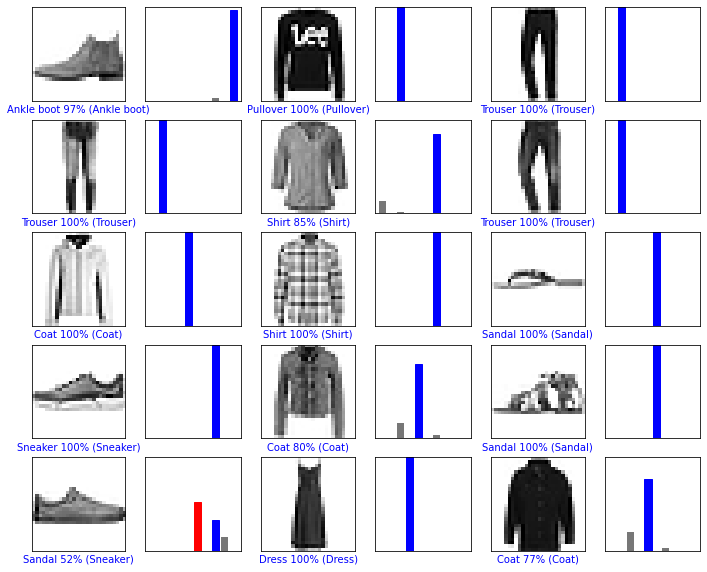

In [38]:
# 처음 X개의 테스트 이미지와 예측 레이블, 진짜 레이블 출력
# 올바른 예측은 파란색, 잘못된 예측은 빨간색

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [39]:
# 테스트셋에서 이미지 하나 선택
img = test_images[0]

print(img.shape)

(28, 28)


In [40]:
# 이미지 하나만 사용할 때도 Batch에 추가
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [42]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.8107641e-08 7.5461051e-13 3.5092032e-10 3.8727803e-09 9.4589325e-08
  2.2093249e-03 5.4121585e-08 3.0012649e-02 1.1514764e-07 9.6777767e-01]]


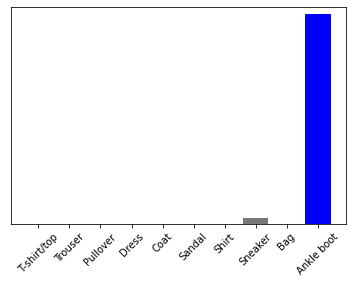

In [43]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])

9